<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH_BV/blob/main/Fourier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1168, 776, 3)


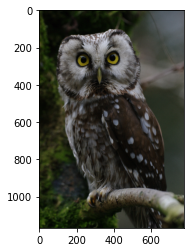

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

image_url = "https://www.nationalpark-bayerischer-wald.bayern.de/pic/virtuell/pressebilder/11/2443867_o.jpg"
img = io.imread(image_url)[::4,::4,:]/255#[::4,::4,:]/255

print(img.shape)
plt.figure()
plt.imshow(img)
plt.show()

(-24511.177619664923-5903.937140382205j) (198126.5960784313+0j)


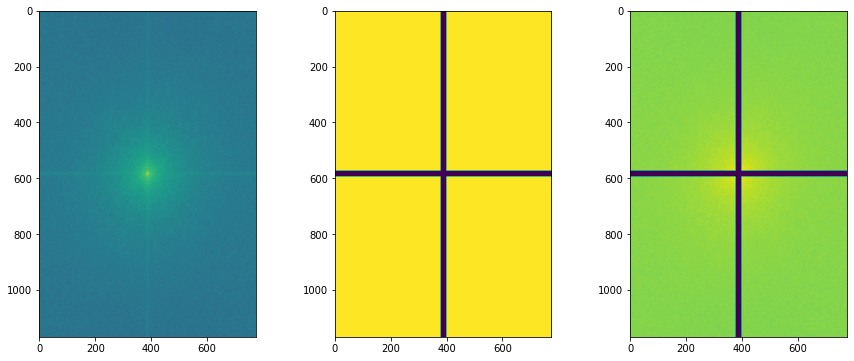

1.3072379858229999e-05 0.4744161289686726


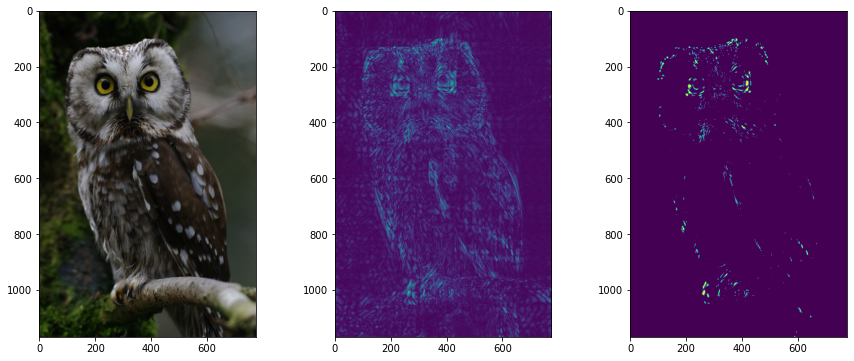

In [ ]:
np_ft = np.fft.fftshift(np.fft.fft2(img[:,:,0]))
print(np.min(np_ft), np.max(np_ft))
xx, yy = np_ft.shape
width = 10
thresh = 0.4

filter = np.zeros(np_ft.shape)
filter[:,yy//2-width:yy//2+width] = 1
filter[xx//2-width:xx//2+width,:] = 1
filter = 1-filter

np_ft_filtered = np_ft*filter+1e-10
plt.figure(figsize=[15, 6])
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(np_ft)))
plt.subplot(1,3,2)
plt.imshow(filter)
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(np_ft_filtered)))
plt.show()

img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(np_ft_filtered)))
img_filtered_normed = img_filtered-np.min(img_filtered)
img_filtered_normed *= 1/np.max(img_filtered_normed)
img_filtered_normed[img_filtered_normed>=thresh] = 1
img_filtered_normed[img_filtered_normed<thresh] = 0
print(np.min(img_filtered), np.max(img_filtered))
plt.figure(figsize=[15, 6])
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(img_filtered)
plt.subplot(1,3,3)
plt.imshow(img_filtered_normed)
plt.show()

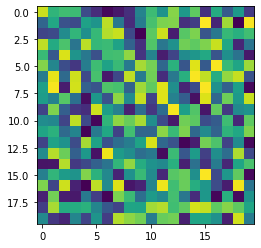

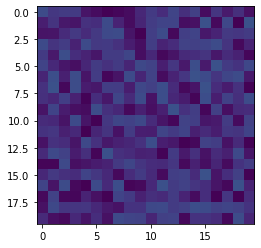

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.rand(20,20)

plt.figure()
plt.imshow(data)
plt.show()
plt.figure()
plt.imshow(data/2, vmin=0, vmax=2)
plt.show()